<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Instruction" data-toc-modified-id="Instruction-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Instruction</a></span></li><li><span><a href="#Submision" data-toc-modified-id="Submision-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Submision</a></span></li></ul></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load data</a></span></li></ul></li><li><span><a href="#GAN-setup" data-toc-modified-id="GAN-setup-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GAN setup</a></span><ul class="toc-item"><li><span><a href="#Generator-and-Discriminator" data-toc-modified-id="Generator-and-Discriminator-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Generator and Discriminator</a></span></li><li><span><a href="#Progress" data-toc-modified-id="Progress-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Progress</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Training</a></span></li></ul></li><li><span><a href="#Run-training" data-toc-modified-id="Run-training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Run training</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Compile-model" data-toc-modified-id="Compile-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Compile model</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Train</a></span></li></ul></li><li><span><a href="#Result" data-toc-modified-id="Result-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Result</a></span></li></ul></div>

# Homework

## Intro

Generate fashion designs using Tensorflow! Retail is an incredibly lucrative field to enter because so much of retail currently relies on physical assets (stores, clothing, equipment) and a lot of this can now be automated using machine learning technology. We can use generative models to generate shoes, shirts, dresses, unique mugs, basically anything that someone would want to buy. We just need to find a relevant dataset. Generative modeling is incredibly powerful technology that will change how we interact with the internet (see DeepFakes). In this homework, you'll generate novel fashion designs. 

## Instruction

Step 1 - Download the Fashion MNIST dataset [here](https://github.com/zalandoresearch/fashion-mnist)

Step 2 - Use Tensorflow+Keras to create a Generative Adversarial Network that, after training on that dataset, will be able to generate novel images. Use [this](https://github.com/R-Suresh/GAN_fashion_MNIST/blob/master/gan.py) as a guide to help you understand this process. Show the training process and 2 examples of generated images inside of a jupyter notebook. 

## Submision

Submit your github link to gradedhomeworkassignments@gmail.com with "Week 6" as the title of your email. The deadline is 2 weeks from assignment.

# Libraries

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D,LeakyReLU

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from random import randint

# Data

## Load data

In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data() 

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Size of data:

In [3]:
print("train_images:", X_train.shape)
print("test_images:", Y_test.shape)

train_images: (60000, 28, 28)
test_images: (10000,)


Sample pictures

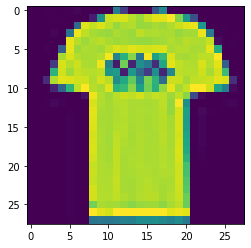

In [4]:
plt.figure()
plt.imshow(X_train[56789])
plt.grid(False)

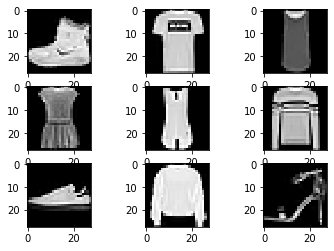

In [5]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))


# GAN setup

## Generator and Discriminator

In [6]:
def build_generator():
  
  model = Sequential()
  
  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(np.prod(img_shape), activation='tanh'))
  model.add(Reshape(img_shape))
  
  model.summary()
  
  noise = Input(shape=(100,))
  img = model(noise)
  
  return Model(noise, img)

In [7]:
def build_discriminator():
  
  model = Sequential()
  
  model.add(Flatten(input_shape=img_shape))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid'))
  
  model.summary()
  
  img = Input(shape=img_shape)
  validity = model(img)
  
  return Model(img, validity)

## Progress

In [8]:
def sample_images(epoch):
  r, c = 3, 3
  noise = np.random.normal(0, 1, (r * c, 100))
  gen_imgs = generator.predict(noise)
  
  # Rescale images 0 - 1
  gen_imgs = 0.5 * gen_imgs + 0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
      for j in range(c):
          axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
          axs[i,j].axis('off')
          cnt += 1
  plt.show()
  plt.close()

## Training

In [9]:
X_train_tmp=X_train.copy()

In [10]:
def train(epochs, batch_size=128, sample_interval=50):
  
  # Rescale -1 to 1
  X_train = X_train_tmp / 127.5 - 1
  X_train = np.expand_dims(X_train, axis=3)
  

  # Adversarial ground truths: mixing outputs for classification 
  valid = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))
  
  for epoch in range(epochs):
    
    # ---------------------
    #  Train Discriminator
    # ---------------------
    
    # Select a random batch of images
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    
    # Generate a batch of new images
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs =  generator.predict(noise)
    
    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # ---------------------
    #  Train Generator
    # ---------------------
    
    g_loss = combined.train_on_batch(noise, valid)
    
    # Plot the progress
    if epoch % sample_interval == 0:
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
        sample_images(epoch)

# Run training

## Parameters

In [28]:
epochs = 20001
batch_size = 32
sample_interval = 500
img_shape =(28,28,1)
optimizer = Adam(0.0002, 0.5)

## Compile model

In [29]:
# Building and compiling the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Accuracy'])

# Building the generator
generator = build_generator()

noise = Input(shape=(100,))
img = generator(noise)

# Making the discriminator not trainable
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(noise, validity)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

## Train

0 [D loss: 0.825534, acc.: 0.00%] [G loss: 0.848514]


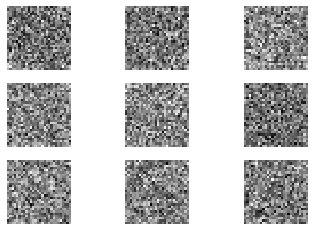

500 [D loss: 0.632014, acc.: 0.00%] [G loss: 0.950314]


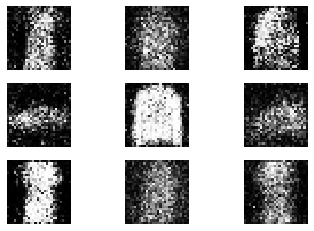

1000 [D loss: 0.651317, acc.: 0.00%] [G loss: 0.839374]


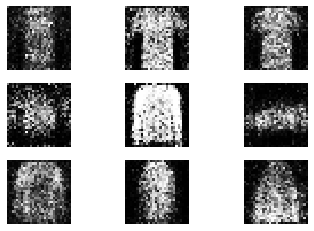

1500 [D loss: 0.675998, acc.: 0.00%] [G loss: 0.852315]


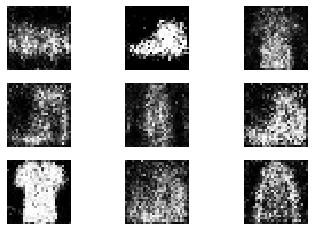

2000 [D loss: 0.613494, acc.: 0.00%] [G loss: 0.890879]


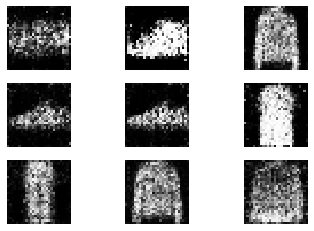

2500 [D loss: 0.552562, acc.: 0.00%] [G loss: 0.995294]


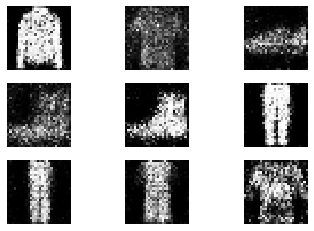

3000 [D loss: 0.668495, acc.: 0.00%] [G loss: 0.881343]


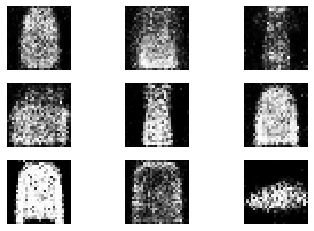

3500 [D loss: 0.650060, acc.: 0.00%] [G loss: 0.945769]


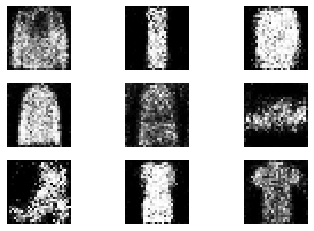

4000 [D loss: 0.661616, acc.: 0.00%] [G loss: 0.907784]


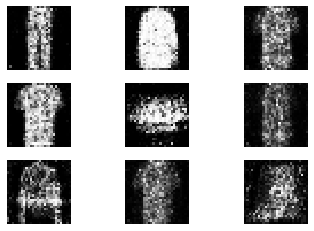

4500 [D loss: 0.609063, acc.: 0.00%] [G loss: 0.936218]


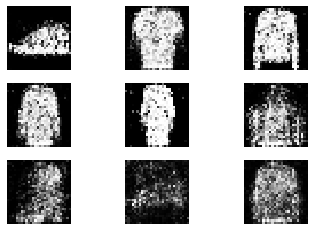

5000 [D loss: 0.695776, acc.: 0.00%] [G loss: 0.833203]


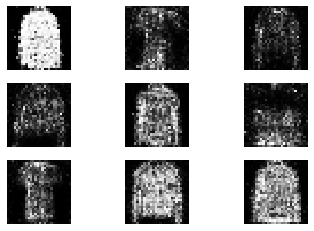

5500 [D loss: 0.621310, acc.: 0.00%] [G loss: 0.931959]


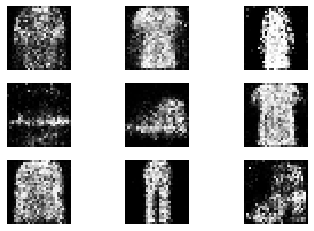

6000 [D loss: 0.592256, acc.: 0.00%] [G loss: 0.931079]


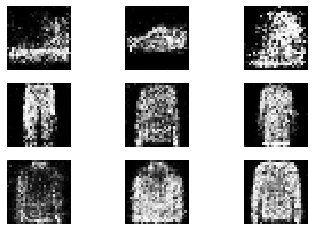

6500 [D loss: 0.607371, acc.: 0.00%] [G loss: 0.964093]


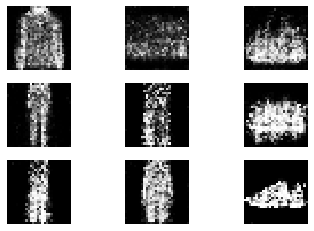

7000 [D loss: 0.675215, acc.: 0.00%] [G loss: 0.921211]


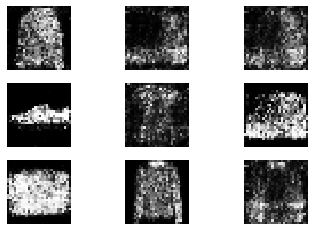

7500 [D loss: 0.647812, acc.: 0.00%] [G loss: 1.003546]


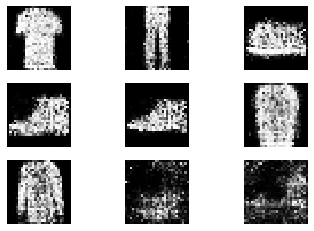

8000 [D loss: 0.617378, acc.: 0.00%] [G loss: 0.839613]


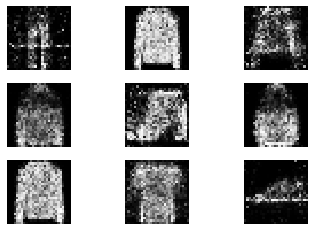

8500 [D loss: 0.622359, acc.: 0.00%] [G loss: 0.878855]


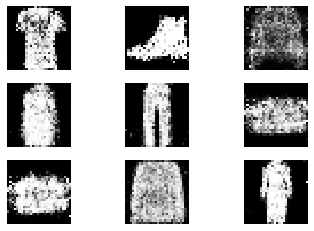

9000 [D loss: 0.624674, acc.: 0.00%] [G loss: 0.902966]


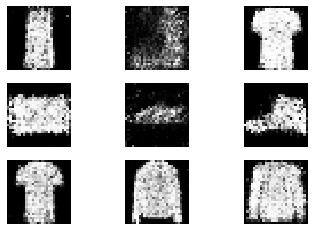

9500 [D loss: 0.680709, acc.: 0.00%] [G loss: 0.896901]


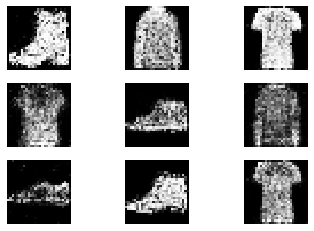

10000 [D loss: 0.601758, acc.: 0.00%] [G loss: 0.998459]


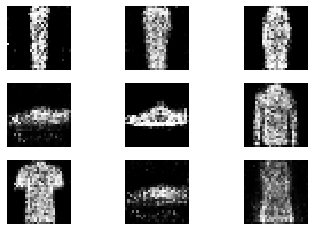

10500 [D loss: 0.684919, acc.: 0.00%] [G loss: 0.952495]


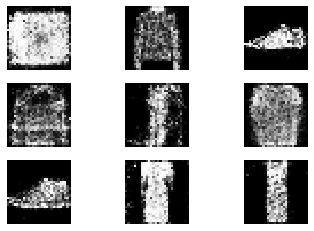

11000 [D loss: 0.696578, acc.: 0.00%] [G loss: 0.942898]


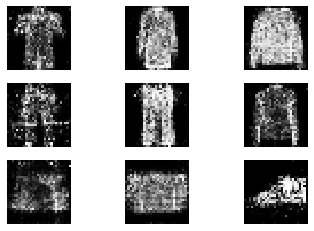

11500 [D loss: 0.664956, acc.: 0.00%] [G loss: 0.902296]


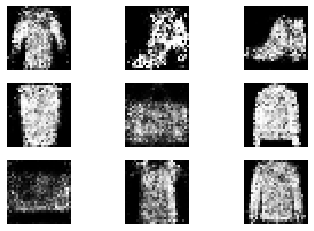

12000 [D loss: 0.670214, acc.: 0.00%] [G loss: 0.979217]


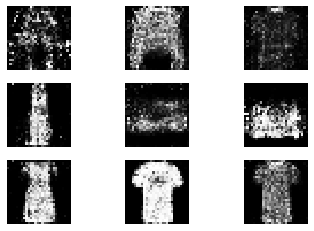

12500 [D loss: 0.660048, acc.: 0.00%] [G loss: 0.890631]


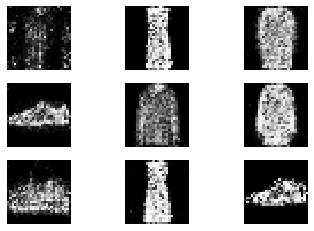

13000 [D loss: 0.678445, acc.: 0.00%] [G loss: 0.904551]


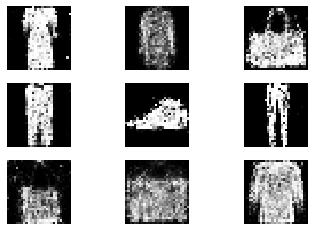

13500 [D loss: 0.651882, acc.: 0.00%] [G loss: 0.845279]


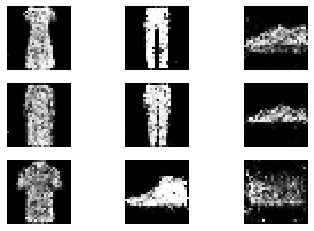

14000 [D loss: 0.669008, acc.: 0.00%] [G loss: 0.919616]


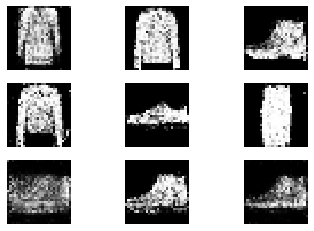

14500 [D loss: 0.633453, acc.: 0.00%] [G loss: 0.896499]


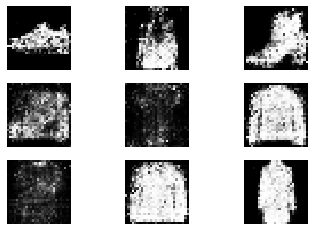

15000 [D loss: 0.669612, acc.: 0.00%] [G loss: 0.872852]


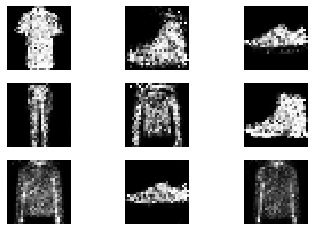

15500 [D loss: 0.683284, acc.: 0.00%] [G loss: 0.978857]


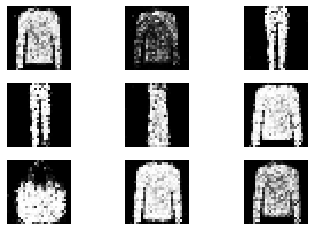

16000 [D loss: 0.697803, acc.: 0.00%] [G loss: 0.903831]


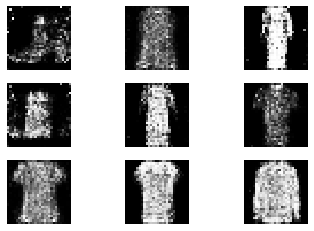

16500 [D loss: 0.712110, acc.: 0.00%] [G loss: 0.894918]


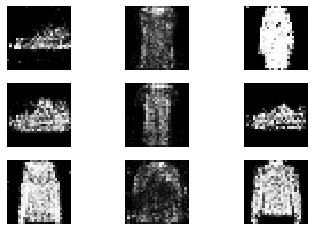

17000 [D loss: 0.692762, acc.: 0.00%] [G loss: 0.885943]


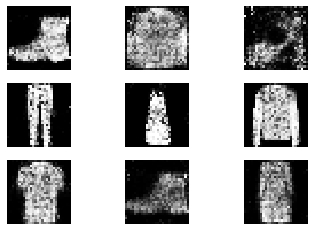

17500 [D loss: 0.634687, acc.: 0.00%] [G loss: 0.936272]


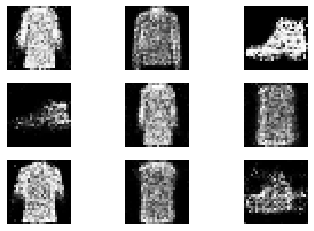

18000 [D loss: 0.645751, acc.: 0.00%] [G loss: 0.905250]


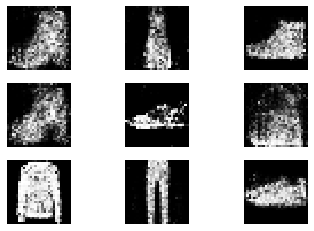

18500 [D loss: 0.599094, acc.: 0.00%] [G loss: 1.014613]


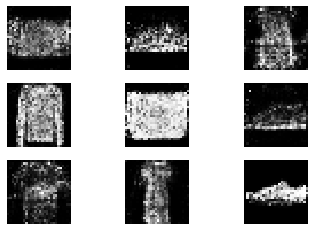

19000 [D loss: 0.642378, acc.: 0.00%] [G loss: 0.950529]


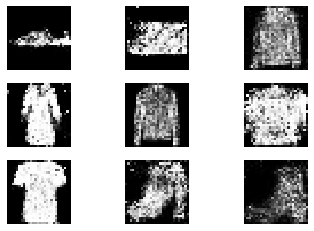

19500 [D loss: 0.650960, acc.: 0.00%] [G loss: 0.932267]


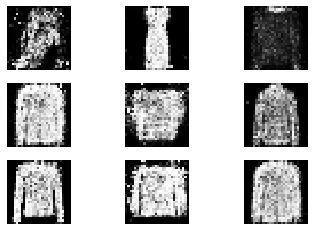

20000 [D loss: 0.676506, acc.: 0.00%] [G loss: 0.921539]


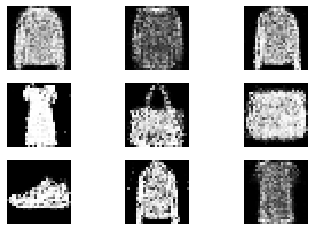

In [30]:
# Training the combined model
train(epochs=epochs, batch_size=batch_size, sample_interval=sample_interval)

# Result

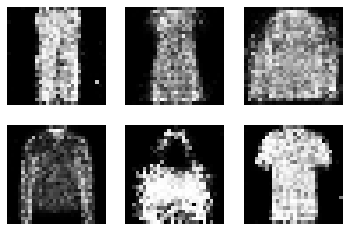

<Figure size 1200x800 with 0 Axes>

In [35]:
r, c = 2, 3

noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

# Rescale images 0 - 1
gen_imgs = 0.5*gen_imgs+0.5

fig, axs = plt.subplots(r, c)
fig=plt.figure(dpi=200)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()
plt.close()